In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dabl

# read the dataset


In [2]:
data = pd.read_csv('StudentsPerformance.csv')

In [3]:
data.shape

(1000, 8)

In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [7]:
# missing data
no_of_columns = data.shape[0]
percentage_ofmissing_data = data.isnull().sum()/no_of_columns
percentage_ofmissing_data


gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='math score', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=8.04E-01'}, xlabel='reading score', ylabel='math score'>,
         <Axes: title={'center': 'F=7.78E-01'}, xlabel='writing score'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=6.69E-02'}, xlabel='math score', ylabel='gender'>,
         <Axes: title={'center': 'F=6.30E-03'}, xlabel='math score', ylabel='race/ethnicity'>,
         <Axes: title={'center': 'F=0.00E+00'}, xlabel='math score', ylabel='parental level of education'>,
         <Axes: title={'center': 'F=0.00E+00'}, xlabel='math score', ylabel='lunch'>,
         <Axes: title={'center': 'F=0.00E+00'}, xlabel='math score', ylabel='test preparation course'>]],
       dtype=object)]

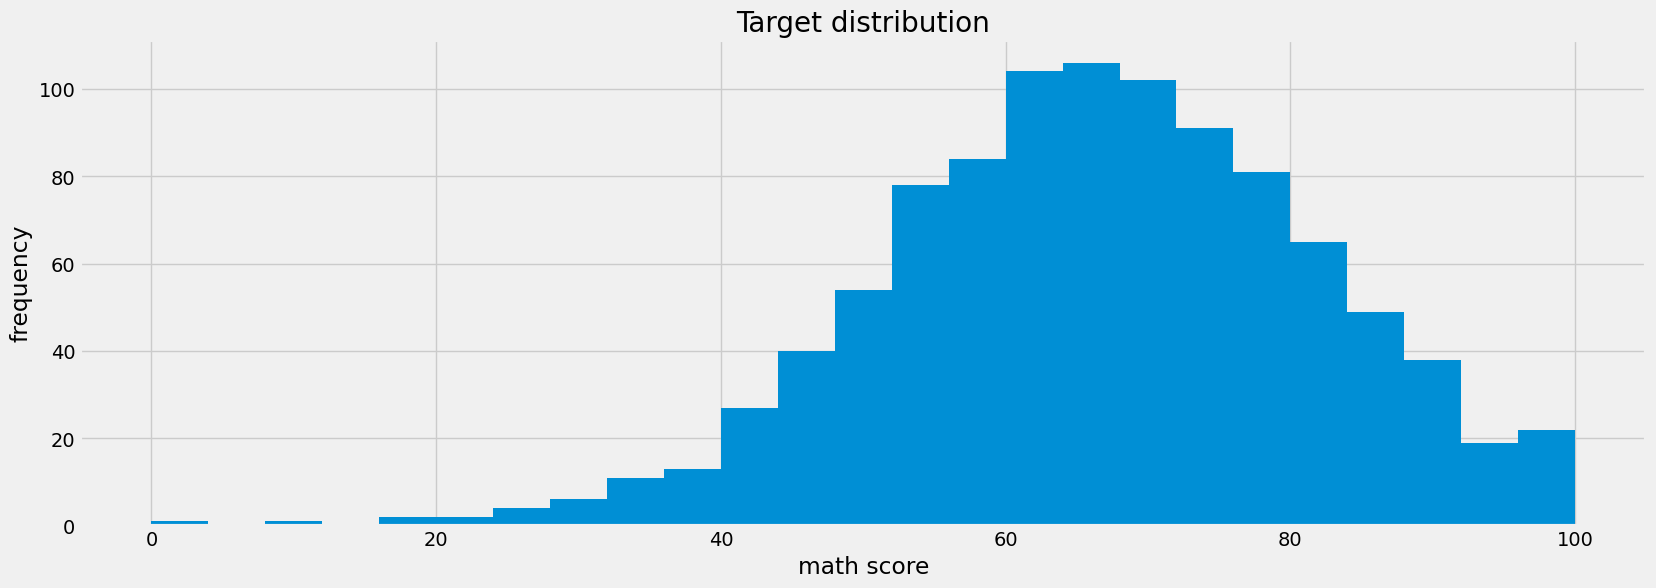

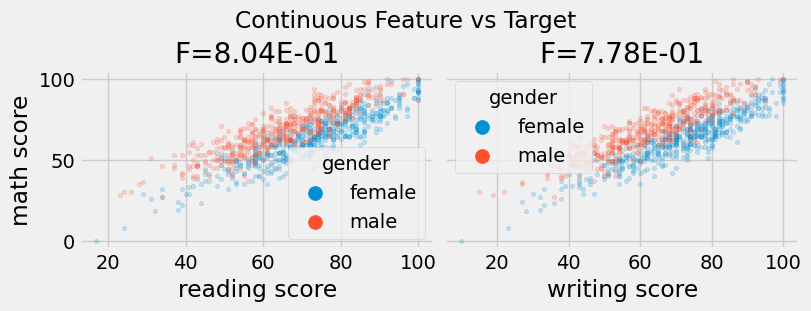

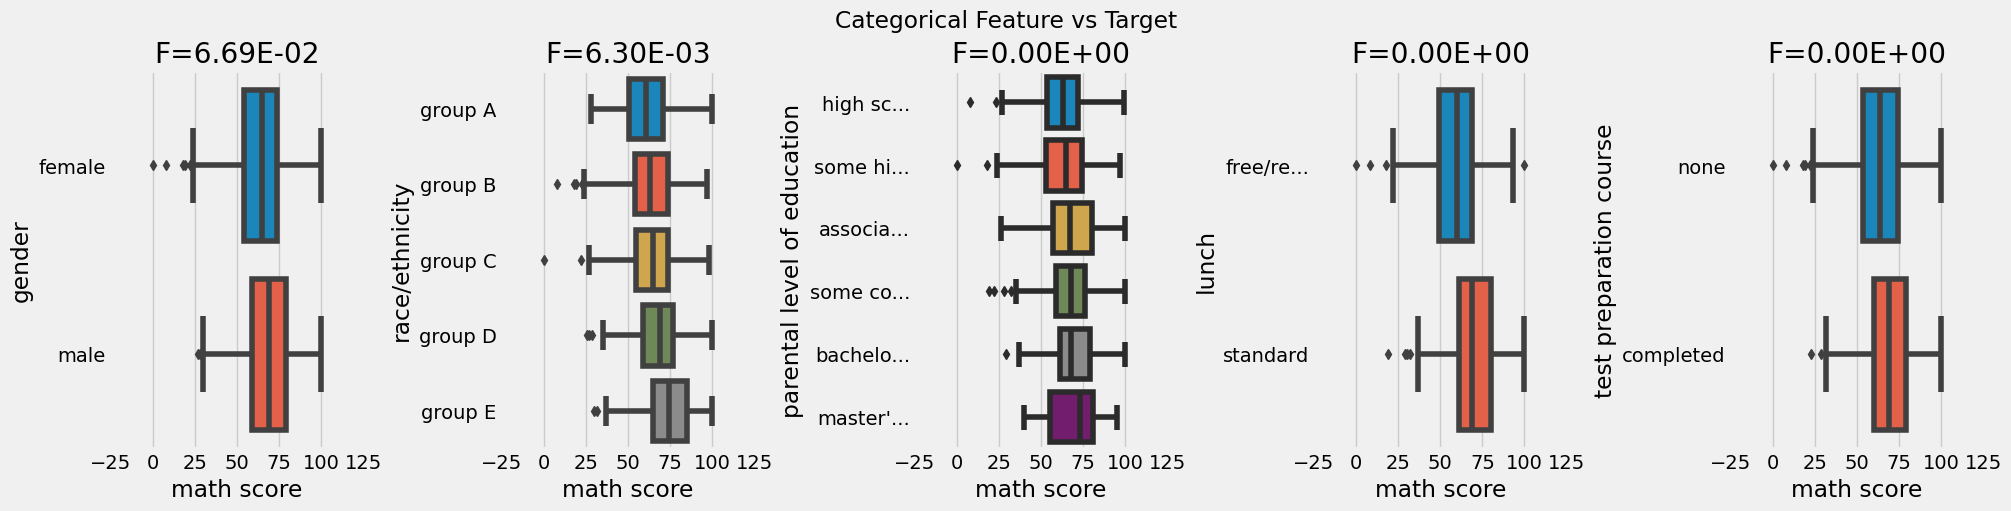

In [8]:
# comparison of all other attributes with respect to math marks

plt.rcParams['figure.figsize'] = (18,6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'math score')

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='reading score', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=9.49E-01'}, xlabel='writing score', ylabel='reading score'>,
         <Axes: title={'center': 'F=8.04E-01'}, xlabel='math score'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=4.85E-02'}, xlabel='reading score', ylabel='gender'>,
         <Axes: title={'center': 'F=2.69E-02'}, xlabel='reading score', ylabel='race/ethnicity'>,
         <Axes: title={'center': 'F=1.39E-02'}, xlabel='reading score', ylabel='parental level of education'>,
         <Axes: title={'center': 'F=1.16E-02'}, xlabel='reading score', ylabel='lunch'>,
         <Axes: title={'center': 'F=9.40E-04'}, xlabel='reading score', ylabel='test preparation course'>]],
       dtype=object)]

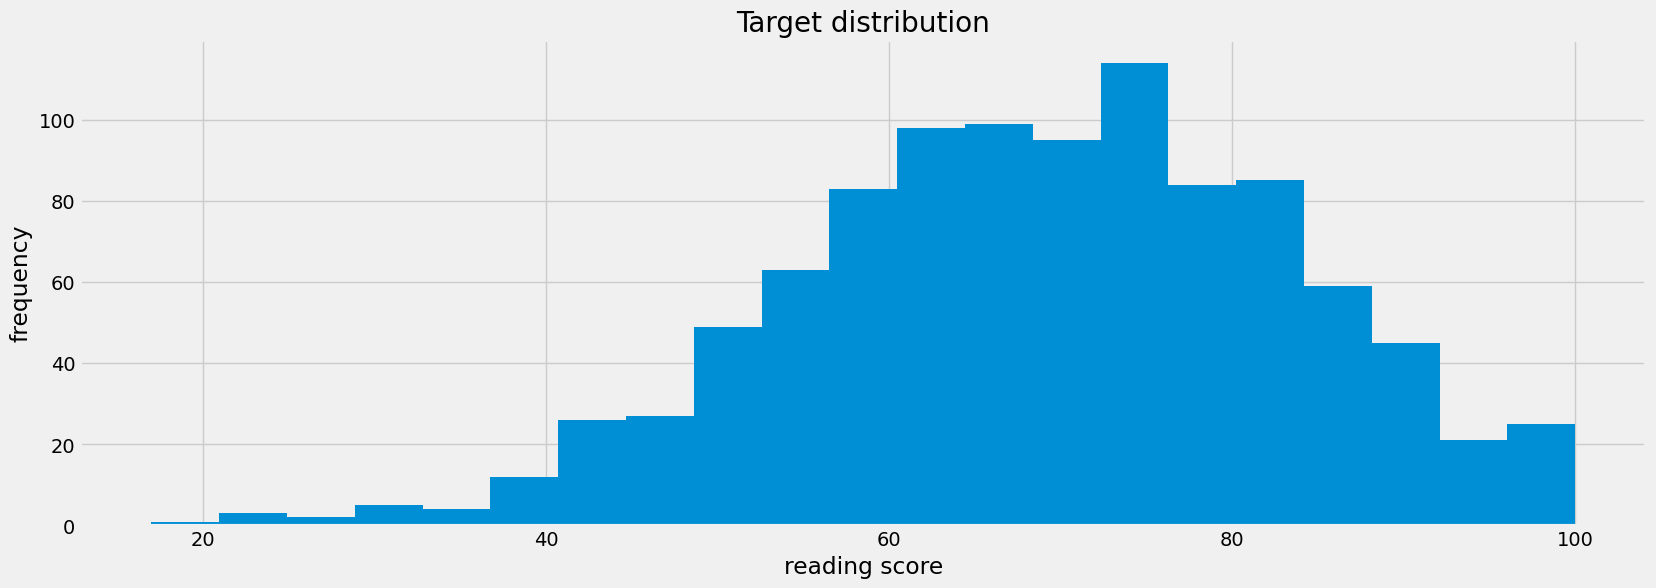

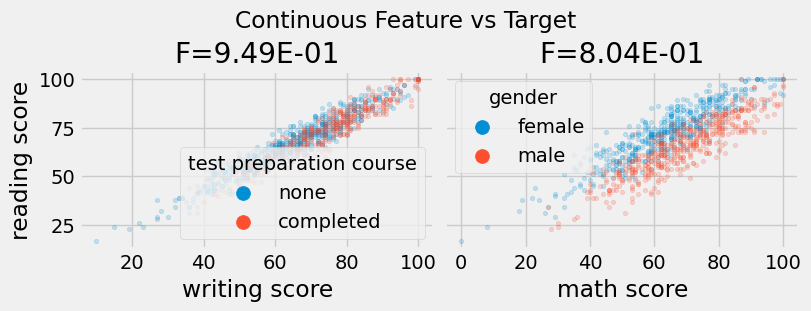

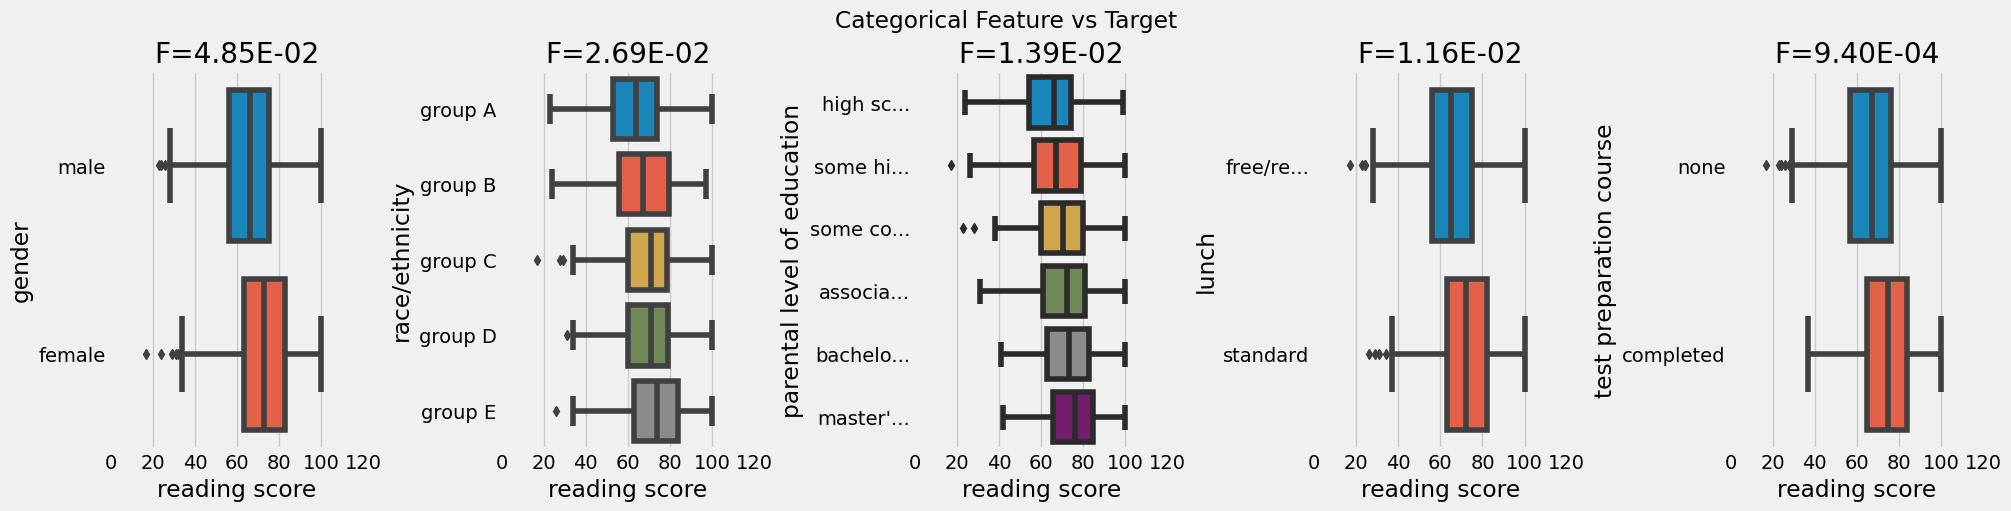

In [9]:
# comparison of all other attributes with respect to reading marks

plt.rcParams['figure.figsize'] = (18,6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'reading score')

In [10]:
# effect of lunch on student's performnace

data[['lunch','gender','math score','writing score','reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

In [11]:
data[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female        67.0           79.0           78.0
                        male          73.0           70.0           71.0
none                    female        62.0           70.0           71.0
                        male          67.0           60.0           63.0

In [12]:
data[['test preparation course','lunch',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['gender']).agg('median')

C:\Users\nilka\AppData\Local\Temp\ipykernel_9504\1672438114.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  'reading score']].groupby(['gender']).agg('median')


,math score,writing score,reading score
gender,,,
female,65.0,74.0,73.0
male,69.0,64.0,66.0


## Data visualizations

In [13]:
# visualizing the number of male and female in the dataset

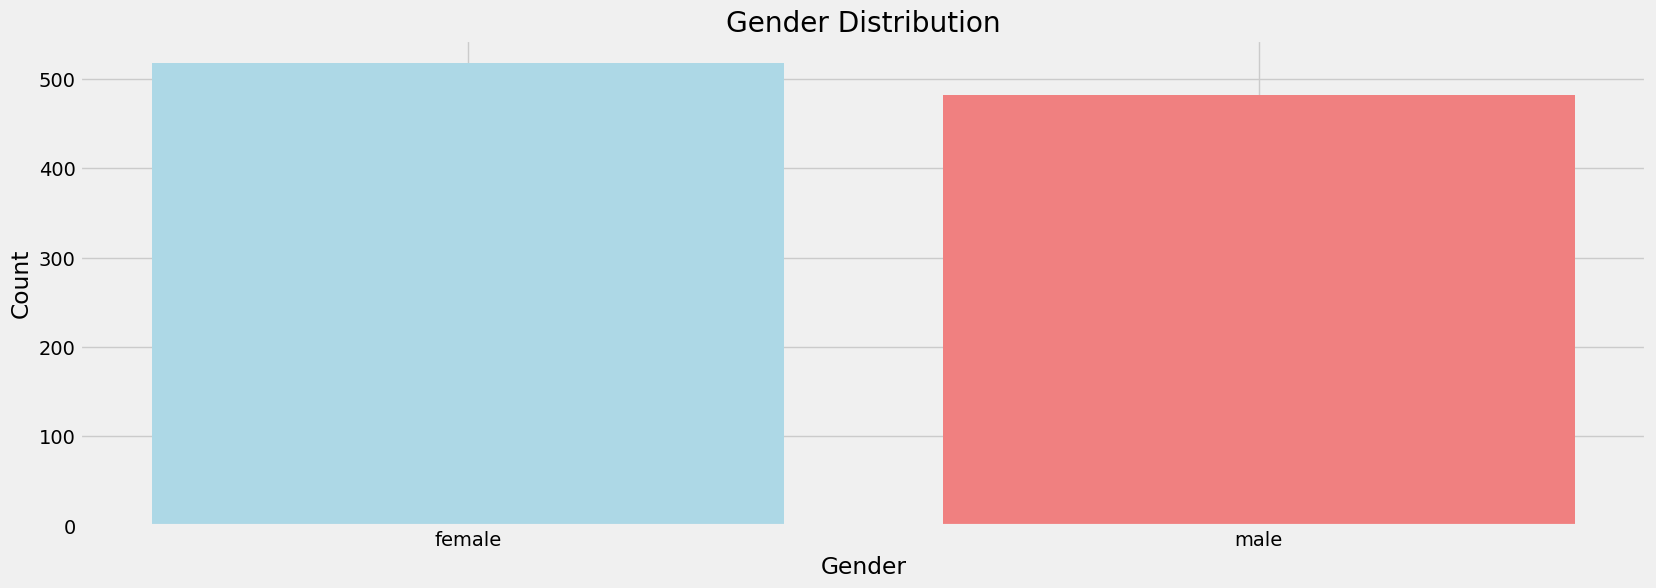

In [14]:
import matplotlib.pyplot as plt

gender_counts = data['gender'].value_counts()
labels = gender_counts.index
counts = gender_counts.values

plt.bar(labels, counts, color=['lightblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [15]:
# visualizing the different groups in the dataset

Text(0, 0.5, 'count')

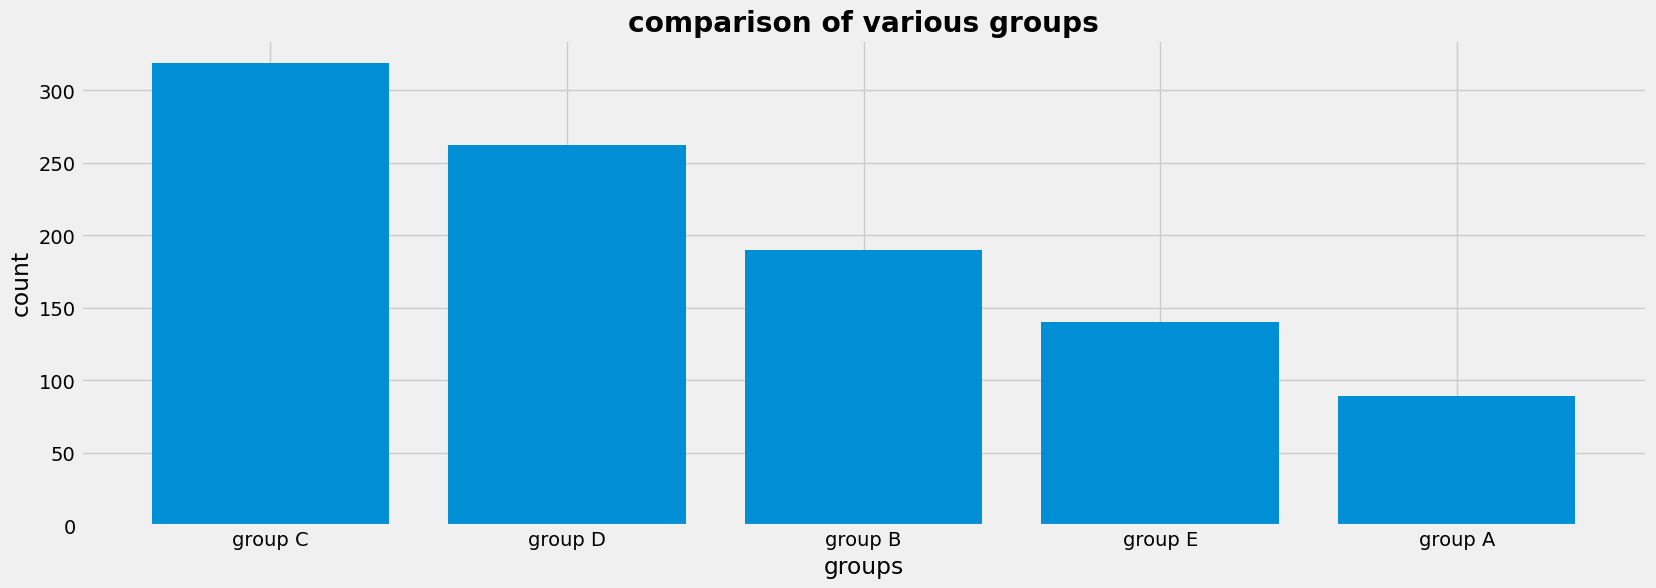

In [16]:
group_count = data['race/ethnicity'].value_counts()
labels = group_count.index
counts = group_count.values

plt.bar(labels,counts)
plt.title('comparison of various groups', fontweight='bold')
plt.xlabel('groups')
plt.ylabel('count')


In [17]:
# visualizing the different parental education level

Text(0, 0.5, 'Count')

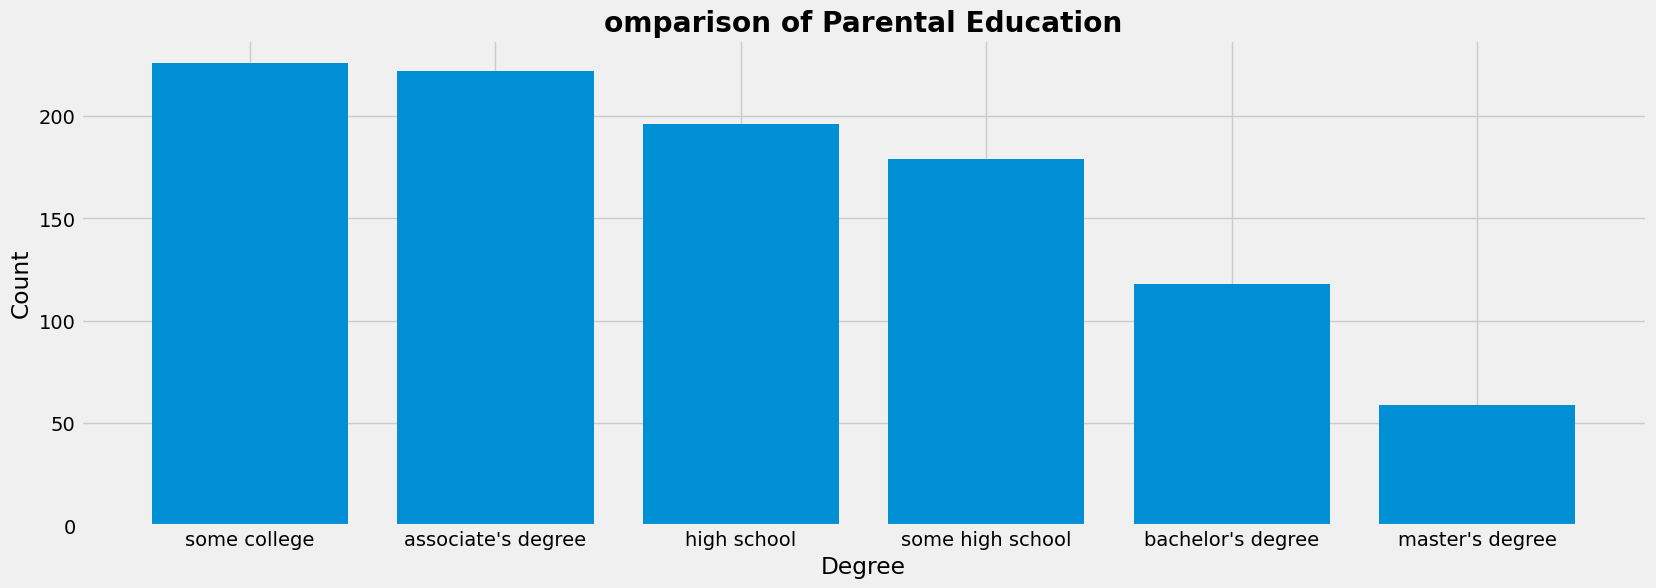

In [18]:
group_count = data['parental level of education'].value_counts()
labels = group_count.index
counts = group_count.values

plt.bar(labels,counts)
plt.title('omparison of Parental Education', fontweight='bold')
plt.xlabel('Degree')
plt.ylabel('Count')

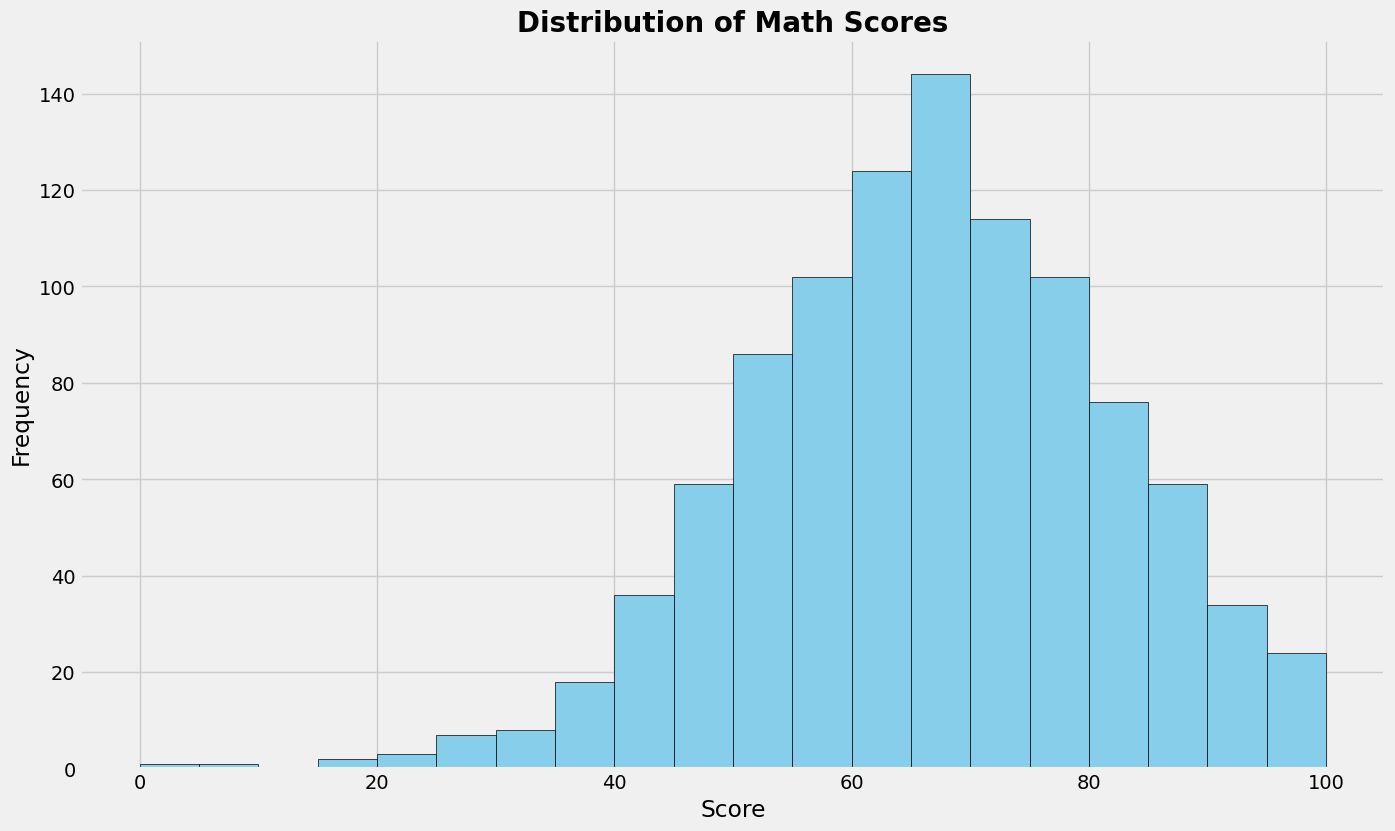

In [19]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 9)
plt.hist(data['math score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Math Scores', fontweight='bold', fontsize=20)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [20]:
import warnings 
warnings.filterwarnings('ignore')

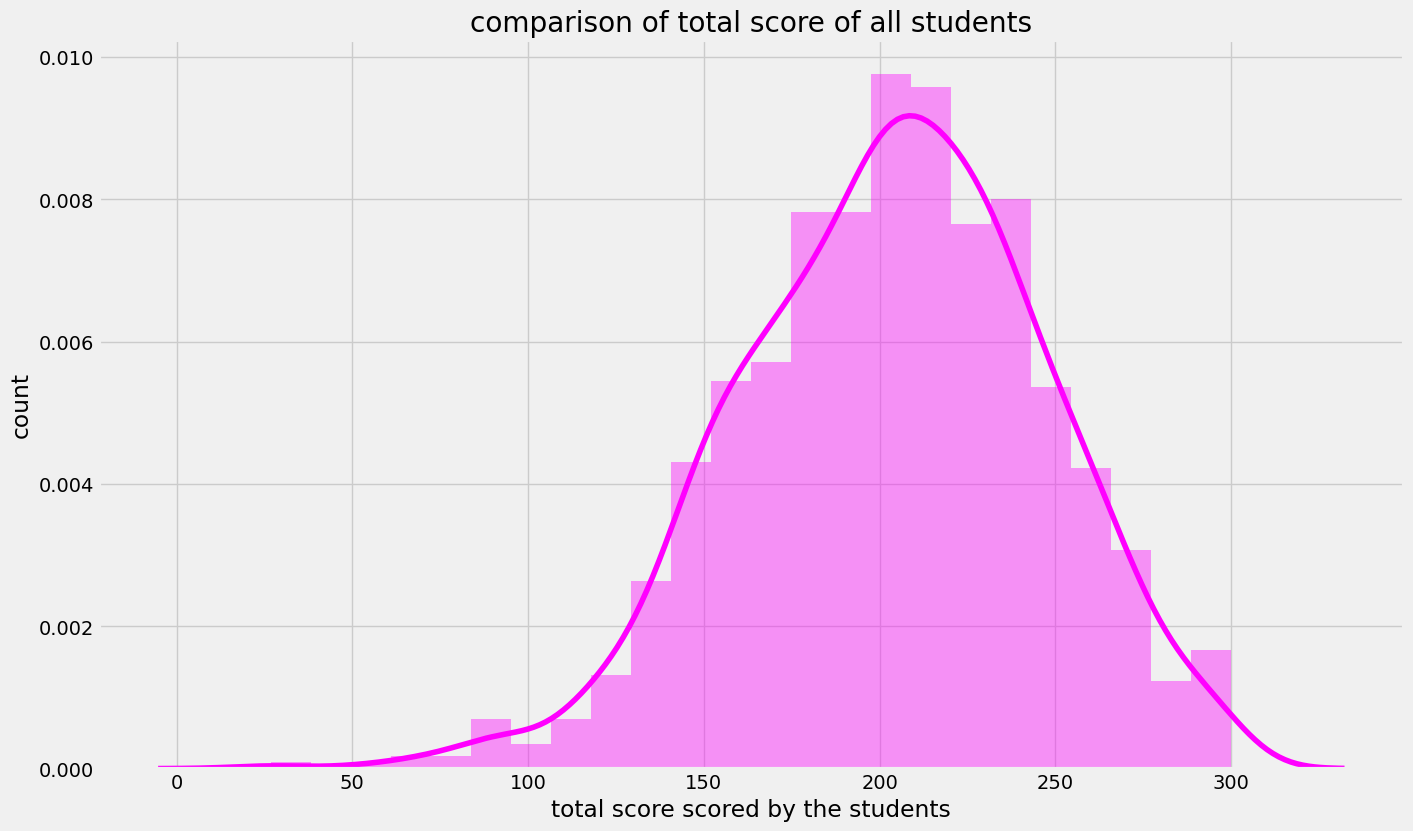

In [21]:
# computing the total score for each student
data['total_score'] = data['math score'] + data['reading score']+ data['writing score']
sns.distplot(data['total_score'],color = 'magenta')

plt.title('comparison of total score of all students')
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

In [22]:
# computing percentage for each of the students

In [23]:
from math import *


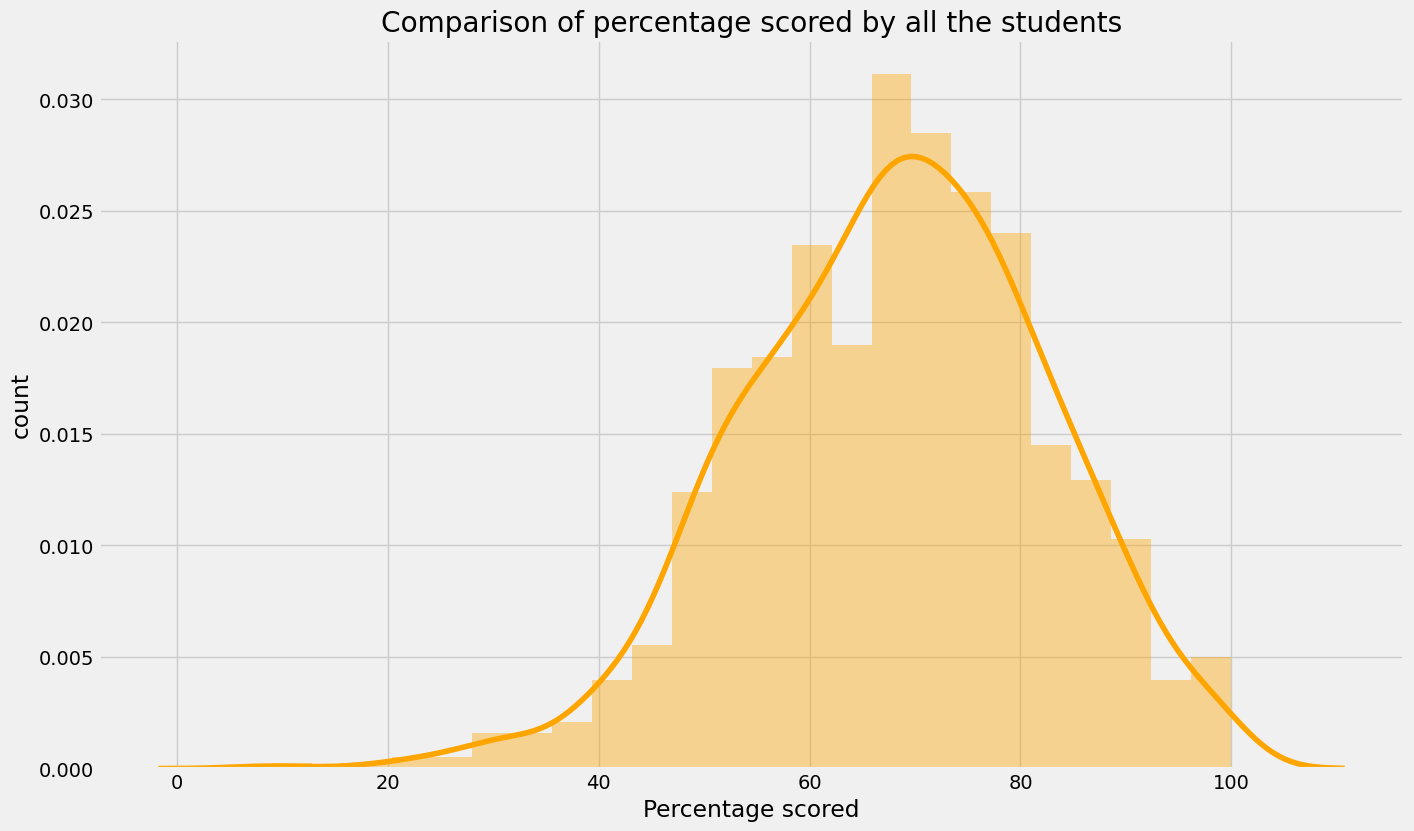

In [24]:
data['percentage'] = data['total_score']/3

for i in range(0,1000):
    data['percentage'][i] = ceil(data['percentage'][i])
    
plt.rcParams['figure.figsize'] = (15,9)
sns.distplot(data['percentage'],color = 'orange')

plt.title('Comparison of percentage scored by all the students')
plt.xlabel('Percentage scored')
plt.ylabel('count')
plt.show()

In [25]:
def getgrade(percentage):
    
    if (percentage >=90):
        return 'O'
    if (percentage >= 80):
        return 'A'
    if (percentage >= 70):
        return 'B'
    if (percentage >=60):
        return 'C'
    if(percentage >= 50):
        return 'D'
    else:
        return 'E'
    
data['grades'] = data.apply(lambda x: getgrade(x['percentage']),axis = 1)
data['grades'].value_counts()

B    260
C    252
D    178
A    156
E     96
O     58
Name: grades, dtype: int64

# Label Encoding 

In [26]:
from sklearn.preprocessing import LabelEncoder

In [28]:
# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
data['test preparation course'] = le.fit_transform(data['test preparation course'])

#  label encoding for lunch
data['lunch'] = le.fit_transform(data['lunch'])

# label encoding for race
data['race/ethnicity'] = data['race/ethnicity'].replace('group A',1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B',2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C',3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D',4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E',5)




In [39]:
data['parental level of education'] = le.fit_transform(data['parental level of education'])

#label encoding for gender
data['gender'] = le.fit_transform(data['gender'])

# label encoding for pass_math
data['math score'] = le.fit_transform(data['math score'])

# label encoding for pass_reading
data['reading score'] = le.fit_transform(data['reading score'])

# label encoding for pass_writing
data['writing score'] = le.fit_transform(data['writing score'])
data['grades'] = le.fit_transform(data['grades'])

In [64]:
print("Shape of DataFrame:", data.shape)

Shape of DataFrame: (1000, 11)


# Data Preparation
## Splitting the dependent and independent variables

In [69]:
x = data.iloc[:,:11]
y = data.iloc[:, 10]
print(x.shape)
print(y.shape)

(1000, 11)
(1000,)


## Splitting the data into training and testing sets

In [70]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25,  random_state=64)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(750, 11)
(750,)
(250, 11)
(250,)


In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
# create a scalar
mn = MinMaxScaler()
# feeding the independent variable into the scalar
x_train = mn.fit_transform(x_train)
x_test = mn.transform(x_test)

##  Applying principal components analysis

In [73]:
from sklearn.decomposition import PCA

In [74]:
# creating a principal component anaylsis model
pca = PCA(n_components=None)

# feeding the independent variables to PCA model

x_train = pca.fit_transform(x_train)
x_test  = pca.transform(x_test)

In [75]:
# visualizing the principal component that will explain the highest share if variance
explained_variance = pca.explained_variance_ratio_
print(explained_variance)



[2.52128377e-01 2.12148031e-01 1.96296017e-01 1.22036476e-01
 1.06427118e-01 6.49831915e-02 4.16027088e-02 3.02364533e-03
 1.32341604e-03 2.69433996e-05 4.07667766e-06]


In [76]:
# creating a principal component analysis model 
pca  = PCA(n_components = 2)

# feeding the independent variables to the PCA model
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

#  Modelling
## Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
import numpy as np

x_train = np.array(x_train)
y_train = np.array(y_train)
print("x_train data type:", type(x_train))
print("y_train data type:", type(y_train))


x_train data type: <class 'numpy.ndarray'>
y_train data type: <class 'numpy.ndarray'>


In [80]:
# creating the model
model = LogisticRegression()

#  feeding the training data to the model 
model.fit(x_train, y_train)

# predicting the test set results

y_pred = model.predict(x_test)


In [81]:
print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing accuracy: ', model.score(x_test, y_test))

Training Accuracy:  0.38533333333333336
Testing accuracy:  0.372


##  Confusion matrix

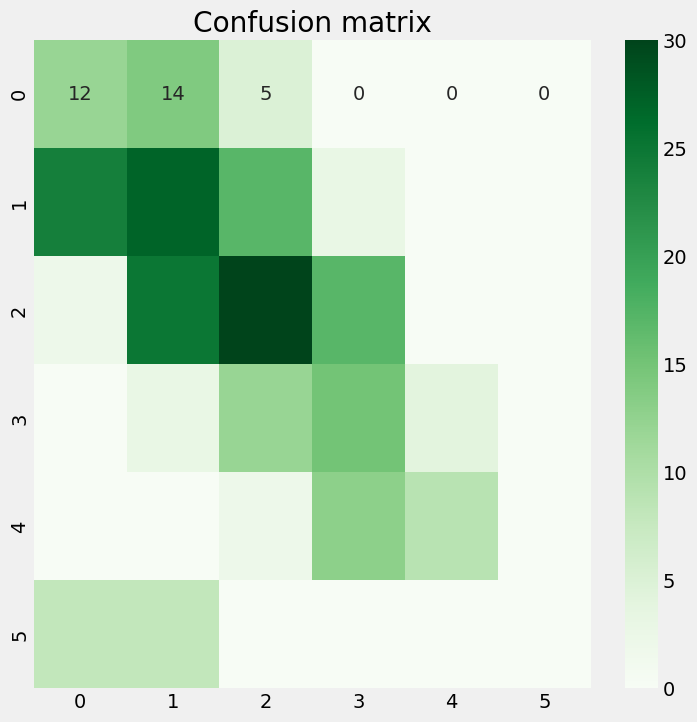

In [83]:
from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix

plt.rcParams['figure.figsize'] = (8,8)
sns.heatmap(cm, annot=True, cmap = 'Greens')
plt.title('Confusion matrix')
plt.show()